In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("pavdatfinal.csv")

In [3]:
data.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS,bug
0,0.0,0,0,0,0.0,0.0,0,0,6,1,...,13,0,13,0,13,49,0,13,0,0
1,0.0,0,0,0,0.0,0.0,0,0,0,0,...,5,0,5,0,5,8,0,5,0,0
2,0.0,0,0,0,0.0,0.0,0,0,1,4,...,4,0,3,2,4,33,0,3,2,0
3,0.0,0,0,0,0.0,0.0,0,0,2,1,...,15,2,15,0,15,21,5,15,0,0
4,0.0,0,0,0,0.0,0.0,0,0,0,0,...,2,0,2,0,2,0,0,2,0,0


In [4]:
X = data.drop('bug', axis = 1)
y = data['bug']
X.head()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,TNLG,TNLM,TNLPA,TNLPM,TNLS,TNM,TNOS,TNPA,TNPM,TNS
0,0.0,0,0,0,0.0,0.0,0,0,6,1,...,2,13,0,13,0,13,49,0,13,0
1,0.0,0,0,0,0.0,0.0,0,0,0,0,...,4,5,0,5,0,5,8,0,5,0
2,0.0,0,0,0,0.0,0.0,0,0,1,4,...,0,4,0,3,2,4,33,0,3,2
3,0.0,0,0,0,0.0,0.0,0,0,2,1,...,10,15,2,15,0,15,21,5,15,0
4,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0,2,0,2,0,2,0,0,2,0


In [5]:
X.shape,y.shape

((77676, 60), (77676,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

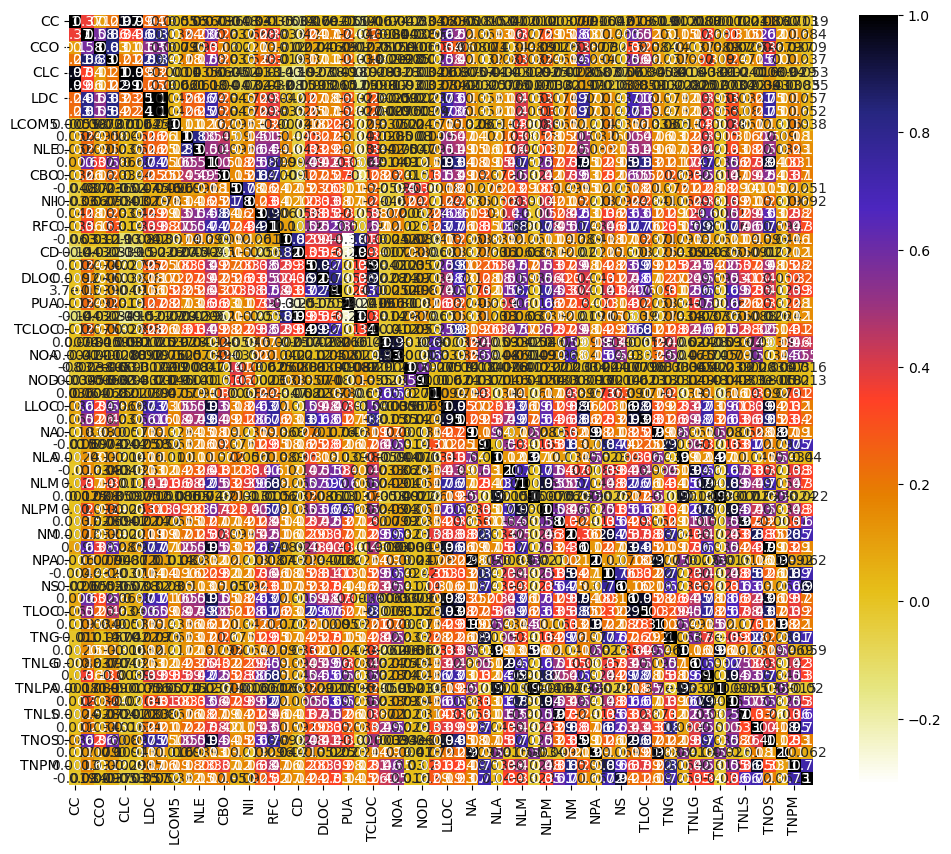

In [8]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr 

In [10]:
corr_features = correlation(X_train, 0.9)
corr_features

{'CLC',
 'CLLC',
 'DLOC',
 'LLDC',
 'LLOC',
 'LOC',
 'NLPA',
 'NLPM',
 'NOA',
 'NOS',
 'NPA',
 'NPM',
 'RFC',
 'TCD',
 'TCLOC',
 'TLLOC',
 'TLOC',
 'TNA',
 'TNG',
 'TNLA',
 'TNLG',
 'TNLM',
 'TNLPA',
 'TNLPM',
 'TNLS',
 'TNOS',
 'TNPA',
 'TNPM',
 'TNS'}

In [11]:
features=['CLC',
 'CLLC',
 'DLOC',
 'LLDC',
 'LLOC',
 'LOC',
 'NLPA',
 'NLPM',
 'NOA',
 'NOS',
 'NPA',
 'NPM',
 'RFC',
 'TCD',
 'TCLOC',
 'TLLOC',
 'TLOC',
 'TNA',
 'TNG',
 'TNLA',
 'TNLG',
 'TNLM',
 'TNLPA',
 'TNLPM',
 'TNLS',
 'TNOS',
 'TNPA',
 'TNPM',
 'TNS']
X_train=X_train.drop(features,axis=1)
X_test.drop(features,axis=1)
X_train 

,Unnamed: 0,CC,CCL,CCO,CI,LDC,LCOM5,NL,NLE,WMC,...,NOP,NA,NG,NLA,NLG,NLM,NLS,NM,NS,TNM
75666,75666,0.000000,0,0,0,0,0,0,0,10,...,1,12,28,0,5,10,5,55,13,55
3638,3638,0.267666,8,51,8,39,3,2,2,43,...,1,6,10,5,10,25,4,26,4,26
24828,24828,0.000000,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,1
4762,4762,0.109225,2,13,3,34,1,4,4,97,...,1,9,13,7,10,34,0,39,0,52
51328,51328,0.000000,0,0,0,0,5,0,0,14,...,1,2,5,1,5,14,3,14,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52473,52473,0.120163,1,2,2,26,2,4,4,48,...,0,1,5,1,5,16,0,16,0,17
41442,41442,0.000000,0,0,0,0,3,0,0,9,...,1,9,6,2,3,9,0,18,1,18
35832,35832,0.000000,0,0,0,0,1,2,2,19,...,1,6,3,3,2,12,2,23,4,23
46900,46900,0.417208,9,28,28,110,1,3,3,36,...,1,3,1,3,1,9,0,9,0,9


In [12]:
#more the value of the F score the more important the feature is and the lesser the value of the p-value the more important will be the feature.
from sklearn.feature_selection import chi2

f_scores, p_values = chi2(X_train, y_train)

print("F-scores:", f_scores)
print("P-values:", p_values)

F-scores: [4.49104189e+08 1.24178955e-02 7.25737759e+03 2.48078974e+05
 1.79905064e+04 1.91713762e+05 2.17538950e+03 1.37329044e+04
 9.88141566e+03 3.89466745e+05 3.67993391e+04 1.08696139e+05
 1.75729103e+05 1.04425468e+05 2.62811365e+03 1.10119718e+03
 1.22887819e+06 8.11250634e+04 3.59318601e+03 9.18194182e+02
 3.32385795e+03 1.48310549e+04 3.84820883e+02 1.43698392e+05
 5.31548152e+04 1.03165359e+05 2.96060144e+04 8.78294856e+04
 1.45974739e+04 1.58699457e+05 2.36674051e+04 1.73660141e+05]
P-values: [0.00000000e+000 9.11270922e-001 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.81420171e-241
 0.00000000e+000 0.00000000e+000 0.00000000e+000 1.08809775e-201
 0.00000000e+000 0.00000000e+000 1.11018751e-085 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.0

In [13]:
#Representing in list form
import pandas as pd
p_values=pd.Series(p_values)
p_values.index=X_train.columns

In [14]:
#Sorting values in ascending order based on index
p_values.sort_index(ascending=False)

WMC            0.000000e+00
Unnamed: 0     0.000000e+00
TNM            0.000000e+00
PUA            0.000000e+00
PDA            0.000000e+00
NS             0.000000e+00
NOP            1.110188e-85
NOI            0.000000e+00
NOD            0.000000e+00
NOC            0.000000e+00
NM             0.000000e+00
NLS            0.000000e+00
NLM            0.000000e+00
NLG            0.000000e+00
NLE            0.000000e+00
NLA            0.000000e+00
NL             0.000000e+00
NII            0.000000e+00
NG             0.000000e+00
NA             0.000000e+00
LDC            0.000000e+00
LCOM5          0.000000e+00
DIT           1.088098e-201
CLOC           0.000000e+00
CI             0.000000e+00
CD            1.814202e-241
CCO            0.000000e+00
CCL            0.000000e+00
CC             9.112709e-01
CBOI           0.000000e+00
CBO            0.000000e+00
AD             0.000000e+00
dtype: float64

In [15]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.53055082, 0.08943862, 0.01858324, 0.02385308, 0.02079409,
       0.03634241, 0.00844834, 0.04834361, 0.04688634, 0.07214947,
       0.03053957, 0.04115783, 0.03546434, 0.04405736, 0.09006187,
       0.17303473, 0.11846673, 0.09048408, 0.04131114, 0.00701858,
       0.00573074, 0.0050764 , 0.00891149, 0.0533273 , 0.04024413,
       0.05145357, 0.0370384 , 0.05702538, 0.02513637, 0.04734976,
       0.02629833, 0.04995883])

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Unnamed: 0    0.530551
CD            0.173035
CLOC          0.118467
PDA           0.090484
AD            0.090062
CC            0.089439
WMC           0.072149
NLM           0.057025
NA            0.053327
NLA           0.051454
TNM           0.049959
NL            0.048344
NM            0.047350
NLE           0.046886
NOI           0.044057
PUA           0.041311
CBOI          0.041158
NG            0.040244
NLG           0.037038
LDC           0.036342
NII           0.035464
CBO           0.030540
NS            0.026298
NLS           0.025136
CCO           0.023853
CI            0.020794
CCL           0.018583
NOP           0.008911
LCOM5         0.008448
DIT           0.007019
NOC           0.005731
NOD           0.005076
dtype: float64

<AxesSubplot:>

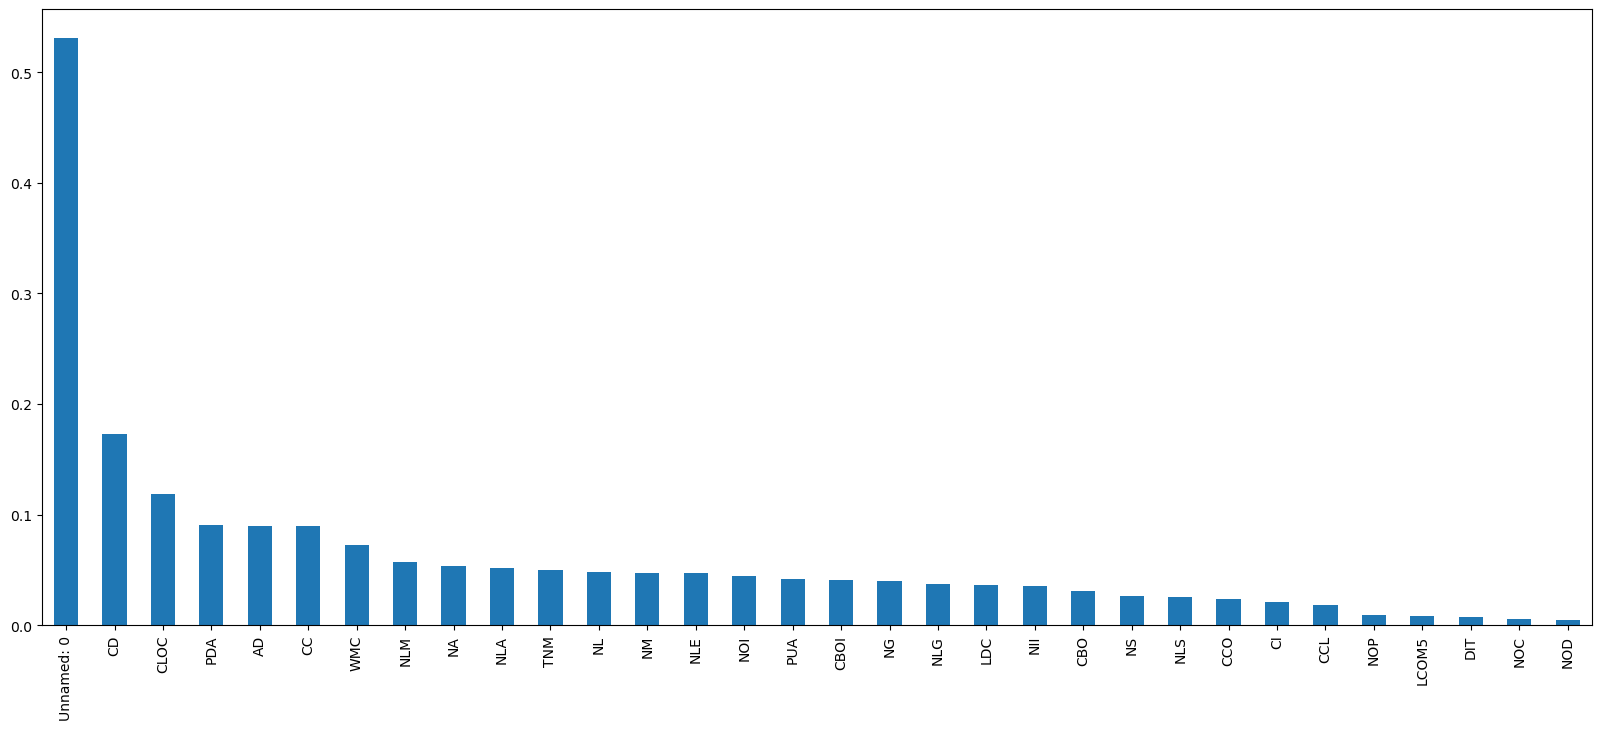

In [17]:
#Plotting the graph
#plot the ordered mutual_info values per feature

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))